# Introduction to Computer Vision
<center>
    <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/790px-Typical_cnn.png />
</center>


**OBJECTIVES**

- Build Edge Detector from scratch
- Understand and implement Convolutional operations with filter
- Understand and implement Max Pooling 
- Use `keras` to implement a Convolutional Neural Network



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

### Building a Classic Neural Net for Images

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


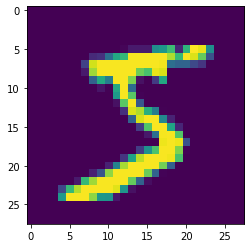

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train[0].shape

(28, 28)

In [10]:
digit_model1 = Sequential() #template for network
digit_model1.add(Flatten()) #expects a stack of 3D things - make into 2D stack of things
digit_model1.add(Dense(100, activation = 'relu')) #1 hidden layer with 100 nodes 
digit_model1.add(Dense(10, activation = 'softmax')) #output 10 nodes because we have 10 classes -- 'softmax' (multiclass)



In [11]:
#compile!

digit_model1.compile(loss = 'categorical_crossentropy', metrics = ['accuracy']) #loss for multi-class metric for classification


In [12]:
###DATA PREP 

#scale our x 
x_train = x_train/255 #greyscale is a number between 0-255
x_test = x_test/255

#one hot encode our y 
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test) 


In [13]:
history = digit_model1.fit(x_train, y_train_ohe, validation_data = (x_test, y_test_ohe),
                 epochs = 20,
                          ) 

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3290 - accuracy: 0.6852 - val_loss: 0.6730 - val_accuracy: 0.8414
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5342 - accuracy: 0.8630 - val_loss: 0.4257 - val_accuracy: 0.8869
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3994 - accuracy: 0.8908 - val_loss: 0.3559 - val_accuracy: 0.9017
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3505 - accuracy: 0.9010 - val_loss: 0.3238 - val_accuracy: 0.9075
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3242 - accuracy: 0.9070 - val_loss: 0.3058 - val_accuracy: 0.9123
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3075 - accuracy: 0.9114 - val_loss: 0.2931 - val_accuracy: 0.9152
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2947 - accuracy: 0.9151 - val_loss: 0.2813 - val_accuracy:

In [ ]:
#higher than the 10% baseline - 

In [ ]:
# #use with scikitlearn
### THIS IS A FUNCTION THAT BUILDS A NEWTWORK
# def networker(layer_1_units = 22, layer_1_activation = 'relu'):
#     model = Sequential()
#     model.add(Flatten())
#     model.add(Dense(layer_1_units, activation = layer_1_activation))
#     model.add(Dense(10, activation = 'softmax'))

#     model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
#     return model

# #Make the Classifier
# kclass = KerasClassifier(build_fn=networker)

# kclass.fit(train_images, train_labels)

# from sklearn.pipeline import make_pipeline

# from sklearn.model_selection import GridSearchCV

# params = {'layer_1_units': [10, 20, 100],
#          'layer_1_activation': ['relu', 'tanh']}

# grid = GridSearchCV(kclass, param_grid=params)

# grid.fit(train_images, train_labels)

# grid.best_params_

# grid.best_score_

### Some Basic Image Work

In [14]:
#create 5 by 5 image
np.random.seed(22)
im = np.random.randint(low = 1, high = 10, size = 25).reshape(5, 5)

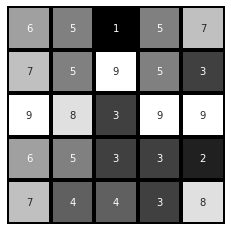

In [15]:
#visualize
sns.heatmap(im, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black')
plt.xticks([])
plt.yticks([]);

In [16]:
#three by three filter - smaller grid
f = np.zeros((3, 3))
f

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [17]:
f[:, 0] = 1
f[:, -1] = -1
f

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

<AxesSubplot:>

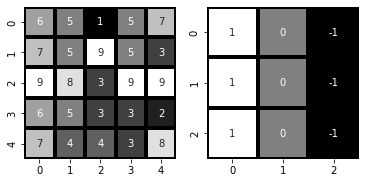

In [18]:
#side by side images
fig, ax = plt.subplots(1, 2)

sns.heatmap(im, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black', ax = ax[0])


sns.heatmap(f, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black', ax = ax[1])


In [19]:
#select upper left corner of image
im[:3, :3]

array([[6, 5, 1],
       [7, 5, 9],
       [9, 8, 3]])

In [20]:
#convolve
np.sum(im[:3, :3]*f)

9.0

In [21]:
#What is this doing?
output = np.zeros((3, 3))
for row in range(3):
    for col in range(3):
        output[row, col] = np.sum(f*im[row: row + 3, col: col + 3])

In [22]:
#examine output
output

array([[ 9., -1., -6.],
       [ 7.,  1.,  1.],
       [12.,  2., -9.]])

### Detecting Edges

In [23]:
#10 by 10 grid
im2 = np.zeros((10, 10))
im2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
#make first half 10
im2[:, :5] = 10

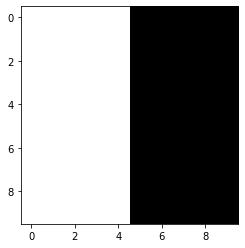

In [25]:
#take a look
plt.imshow(im2, cmap = 'gray')

In [26]:
#convolutions
output = np.zeros((8, 8))
for row in range(8):
    for col in range(8):
        output[row, col] = np.sum(f * im2[row: row + 3, col: col + 3])

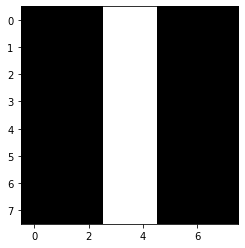

In [27]:
#take a look at result
plt.imshow(output, cmap = 'gray')

In [28]:
f

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

### Edges in X-Rays

**GOAL**: Formalize work from above in a class with a vertical and horizontal edge detector.  Your class should have a `.fit()` method that takes in an image and passes the edge detectors over it once, and a `.show` image that plots the image, vertical edges, and horizontal edges in a 1 x 3 grid.

In [ ]:
chest = plt.imread('images/person10_bacteria_43.jpeg')

In [ ]:
plt.imshow(chest, cmap = 'gray')

In [ ]:
rows = chest.shape[0] - 2
cols = chest.shape[1] - 2

output = np.zeros((rows, cols))
for row in range(rows):
    for col in range(cols):
        output[row, col] = np.sum(f * chest[row: row + 3, col: col + 3])

In [ ]:
plt.imshow(output, cmap = 'gray')

### Max Pooling

<center>
<img src = https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png />
</center>

- Selects maximum value from 2 x 2 square.  In the image above, we have a *stride* of 2.

- Operation will follow convolution

### Using keras

In [57]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

In [58]:
cnn_model = Sequential()
#convolve and pool - extracting features 
cnn_model.add(Conv2D(16, (3,3), activation = 'relu'))
cnn_model.add(MaxPool2D((2,2)))
#flatten 
cnn_model.add(Flatten())
#feed into regular network 
cnn_model.add(Dense(100, activation = 'relu')) 
cnn_model.add(Dense(10, activation = 'softmax')) #softmax is like the sigmoid function but for a higher degree - spits out probabilities


In [59]:
#compile 
cnn_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [69]:
x_train.shape

(60000, 28, 28, 1)

In [70]:
x_test.shape

(10000, 28, 28, 1)

In [33]:
x_train = x_train.reshape(60_000, 28, 28, 1) #60,000 images, 28x28 dimensions
x_test = x_test.reshape(10_000, 28, 28, 1)

In [34]:
history = cnn_model.fit(x_train, y_train_ohe, validation_data = (x_test, y_test_ohe),
                        epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 26s 14ms/step - loss: 1.0581 - accuracy: 0.7109 - val_loss: 0.4225 - val_accuracy: 0.8795
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3624 - accuracy: 0.8928 - val_loss: 0.3082 - val_accuracy: 0.9116
Epoch 3/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2944 - accuracy: 0.9127 - val_loss: 0.2569 - val_accuracy: 0.9236
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2482 - accuracy: 0.9272 - val_loss: 0.2199 - val_accuracy: 0.9344
Epoch 5/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2114 - accuracy: 0.9366 - val_loss: 0.1943 - val_accuracy: 0.9399
Epoch 6/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1849 - accuracy: 0.9442 - val_loss: 0.1676 - val_accuracy: 0.9497
Epoch 7/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1656 - accuracy: 0.9503 - val_loss: 0.1543 -

### Activity: Practice with `keras`

Use the `fashion_mnist` data to construct and compare a standard Artificial Neural Network and one using Convolutions.  

In [61]:
from keras.datasets import fashion_mnist

In [85]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
#10 different fashion items - model to predict the item 

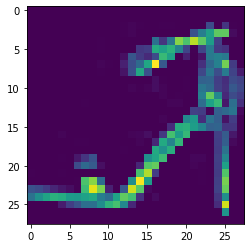

In [63]:
plt.imshow(X_train[8])

In [64]:
X_train = np.divide(X_train, 255)
X_test = np.divide(X_test, 255)

In [84]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [71]:
X_train.shape

(60000, 28, 28)

In [72]:
X_test.shape

(10000, 28, 28)

In [73]:
#reshape 

X_train = x_train.reshape(60_000, 28, 28, 1) #60,000 images, 28x28 dimensions
X_test = x_test.reshape(10_000, 28, 28, 1)


In [74]:
cnn_model = Sequential()
#convolve and pool - extracting features 
cnn_model.add(Conv2D(16, (3,3), activation = 'relu')) #16 different 3,3 filters 
cnn_model.add(MaxPool2D((2,2))) #making image less complicated by summarizing groups of pixels
#flatten 
cnn_model.add(Flatten())
#feed into regular network 
cnn_model.add(Dense(100, activation = 'relu')) 
cnn_model.add(Dense(10, activation = 'softmax')) #softmax is like the sigmoid function but for a higher degree - spits out probabilities

In [75]:
#compile 
cnn_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [76]:
history = cnn_model.fit(X_train, y_train_ohe, validation_data = (X_test, y_test_ohe),
                        epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.9629 - accuracy: 0.7191 - val_loss: 0.3818 - val_accuracy: 0.8881
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3386 - accuracy: 0.8985 - val_loss: 0.2858 - val_accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2722 - accuracy: 0.9189 - val_loss: 0.2370 - val_accuracy: 0.9314
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2266 - accuracy: 0.9325 - val_loss: 0.2012 - val_accuracy: 0.9379
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1939 - accuracy: 0.9423 - val_loss: 0.1757 - val_accuracy: 0.9489
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1711 - accuracy: 0.9497 - val_loss: 0.1624 - val_accuracy: 0.9515
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1543 - accuracy: 0.9541 - val_loss: 0.1496 -

In [77]:
cnn_model.predict(X_test) #gives back probabilities - want the largest 

array([[1.90302984e-07, 9.45960324e-13, 1.29465900e-06, ...,
        9.99913335e-01, 4.54519181e-07, 5.63109154e-07],
       [9.32215698e-06, 6.46998024e-06, 9.99949455e-01, ...,
        4.79575794e-17, 1.34587538e-06, 2.17051769e-16],
       [3.14549098e-08, 9.95813429e-01, 9.58120218e-04, ...,
        3.56792909e-04, 1.78762095e-03, 6.50738639e-06],
       ...,
       [2.97524505e-10, 1.07071079e-11, 3.22168625e-10, ...,
        8.26234918e-06, 1.08141794e-04, 2.30753329e-04],
       [3.13680082e-09, 1.80480042e-09, 8.64493407e-11, ...,
        1.27707992e-11, 2.98945379e-05, 1.21981952e-10],
       [5.76766297e-08, 2.50122080e-13, 5.61511726e-09, ...,
        1.68075189e-14, 1.26836508e-09, 1.34413817e-11]], dtype=float32)

In [81]:
y_test_preds = np.argmax(cnn_model.predict(X_test), axis = 1) #have to convert probabilities 

In [88]:
cnn_model.predict(X_test)[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [86]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [87]:
y_test == y_test_preds

array([False,  True,  True, ..., False, False, False])

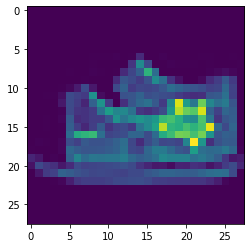

In [89]:
plt.imshow(X_test[-1].reshape(28,28))